In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import cv2
import skvideo.io
from tqdm import tqdm
%matplotlib inline

In [6]:
# constants
DATA_PATH = ''
DRIVE_VIDEO = os.path.join(DATA_PATH, 'train.mp4')
CLEAN_DATA_PATH = ''
CLEAN_IMGS_TRAIN = os.path.join(CLEAN_DATA_PATH, 'train_imgs')



## Dataset construction

## Data loading for training sets provided by txt file 

In [7]:
train_y = list(pd.read_csv(os.path.join(DATA_PATH, 'train.txt'), header=None, squeeze=True))
#assert(len(train_y)==train_frames)

## Data loading for training sets provided by Json file 

In [24]:
train_y = pd.read_json(os.path.join(DATA_PATH, 'drive.json'), orient='records')
train_y = list(train_y[1])
assert(len(train_y)==train_frames)

ValueError: Expected object or value

In [10]:
def dataset_constructor(video_loc, img_folder, dataset_type):
    meta_dict = {}

    tqdm.write('reading in video file...')
#    tot_frames = train_frames
    cap = skvideo.io.vread(video_loc)
     
    tqdm.write('constructing dataset...')
    for idx, frame in enumerate(tqdm(cap)):    
        img_path = os.path.join(img_folder, str(idx)+'.jpg')
        frame_speed = float('NaN') if dataset_type == 'test' else train_y[idx]
        meta_dict[idx] = [img_path, idx, frame_speed]
        status = cv2.imwrite(img_path,frame)

    meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
    meta_df.columns = ['image_path', 'image_index', 'speed']
    
    tqdm.write('writing meta to csv')
    meta_df.to_csv(os.path.join(CLEAN_DATA_PATH, dataset_type+'2_meta.csv'), index=False)
    
    return "done dataset_constructor"

In [11]:
# train data
dataset_constructor(DRIVE_VIDEO, CLEAN_IMGS_TRAIN, 'train')

reading in video file...


  0%|          | 5/20400 [00:00<09:22, 36.23it/s]

constructing dataset...


100%|██████████| 20400/20400 [05:54<00:00, 57.47it/s]


writing meta to csv


'done dataset_constructor'

## Dataset verification

### train 

In [12]:
train_frames = 20400
train_meta = pd.read_csv(os.path.join(CLEAN_DATA_PATH, 'train2_meta.csv'))
assert(train_meta.shape[0] == train_frames)
assert(train_meta.shape[1] == 3)

In [13]:
train_meta.head()

,image_path,image_index,speed
0,train_imgs/0.jpg,0,28.105569
1,train_imgs/1.jpg,1,28.105569
2,train_imgs/2.jpg,2,28.106527
3,train_imgs/3.jpg,3,28.130404
4,train_imgs/4.jpg,4,28.109243


speed: 28.105569
shape: (480, 640, 3)


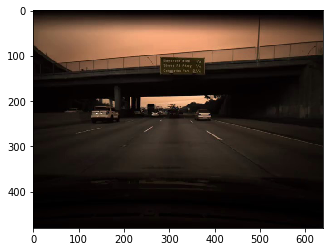

speed: 28.105569
shape: (480, 640, 3)


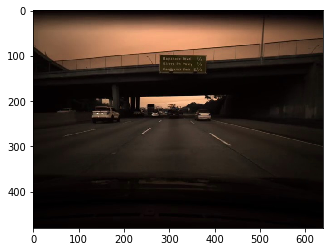

speed: 28.106527000000003
shape: (480, 640, 3)


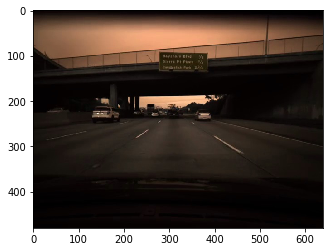

speed: 28.130404
shape: (480, 640, 3)


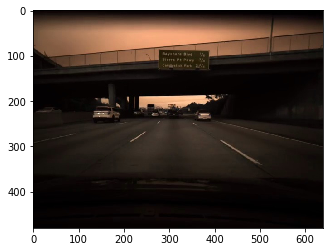

speed: 28.109243
shape: (480, 640, 3)


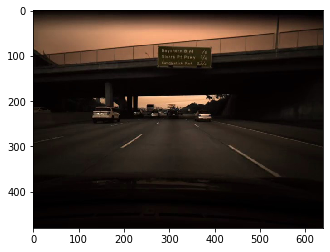

speed: 28.088572
shape: (480, 640, 3)


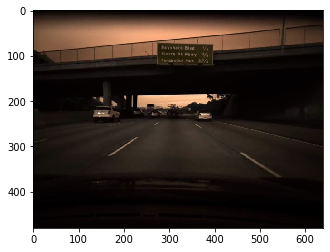

speed: 28.034211
shape: (480, 640, 3)


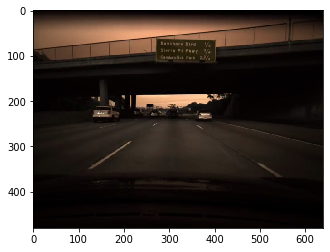

speed: 28.018491
shape: (480, 640, 3)


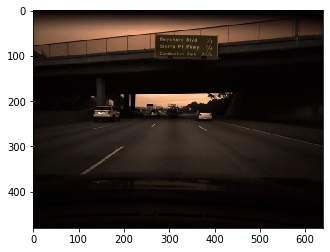

speed: 27.986624
shape: (480, 640, 3)


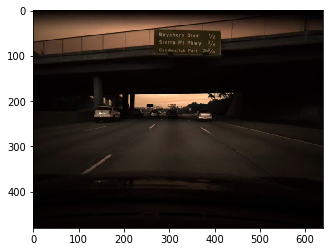

speed: 28.016352
shape: (480, 640, 3)


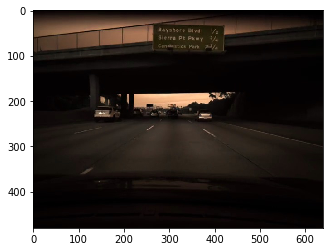

speed: 27.981986
shape: (480, 640, 3)


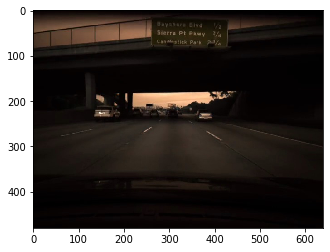

speed: 27.978625
shape: (480, 640, 3)


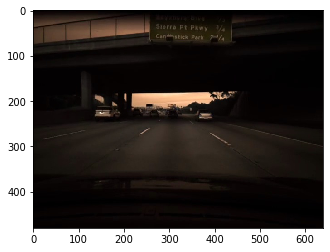

speed: 28.032331
shape: (480, 640, 3)


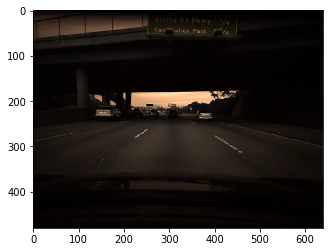

speed: 27.960219
shape: (480, 640, 3)


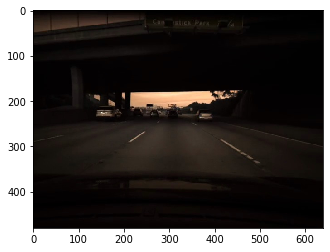

speed: 27.937178000000007
shape: (480, 640, 3)


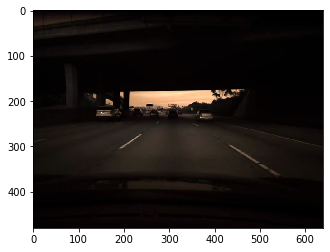

speed: 27.940599
shape: (480, 640, 3)


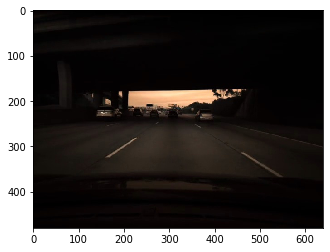

speed: 27.908579
shape: (480, 640, 3)


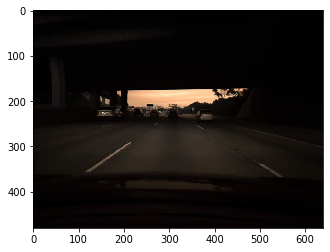

speed: 27.898606
shape: (480, 640, 3)


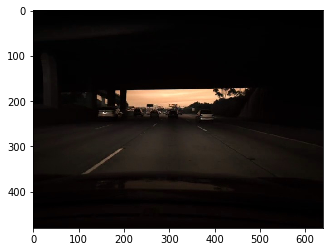

speed: 27.855982
shape: (480, 640, 3)


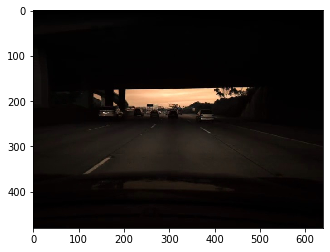

speed: 27.795581
shape: (480, 640, 3)


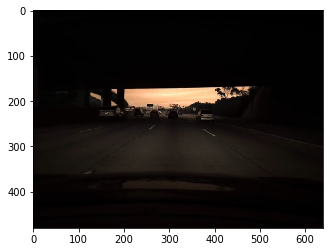

speed: 27.850634000000003
shape: (480, 640, 3)


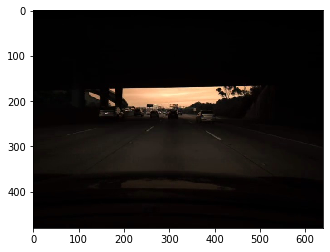

speed: 27.839349
shape: (480, 640, 3)


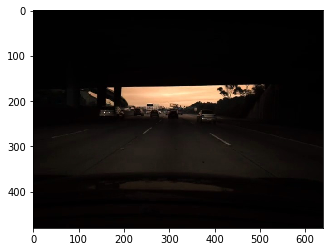

speed: 27.824348
shape: (480, 640, 3)


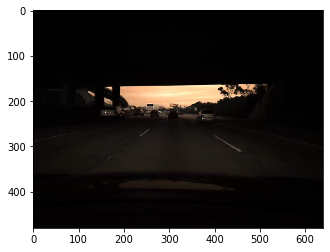

speed: 27.759608
shape: (480, 640, 3)


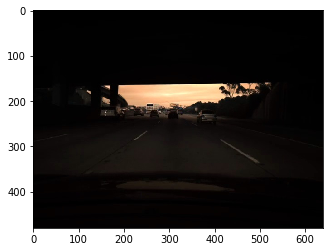

speed: 27.830055
shape: (480, 640, 3)


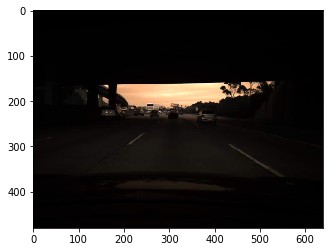

speed: 27.761886
shape: (480, 640, 3)


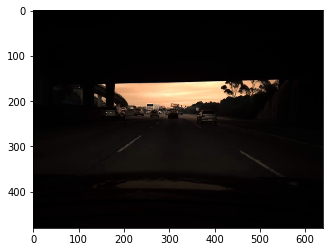

speed: 27.694763
shape: (480, 640, 3)


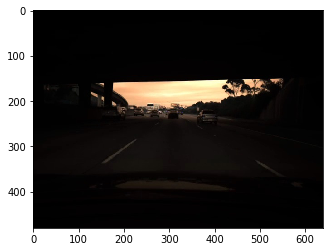

speed: 27.761203
shape: (480, 640, 3)


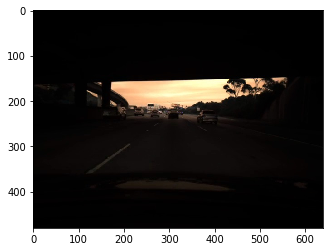

speed: 27.691932
shape: (480, 640, 3)


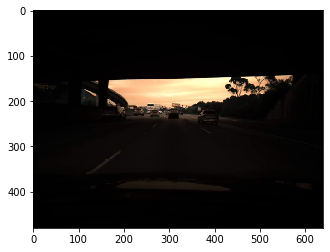

speed: 27.666086
shape: (480, 640, 3)


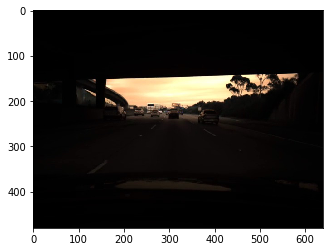

speed: 27.723912
shape: (480, 640, 3)


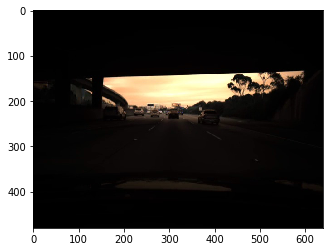

speed: 27.639469
shape: (480, 640, 3)


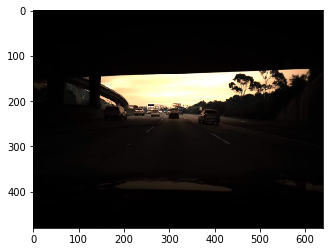

speed: 27.612874
shape: (480, 640, 3)


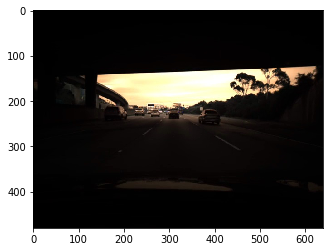

speed: 27.638534000000003
shape: (480, 640, 3)


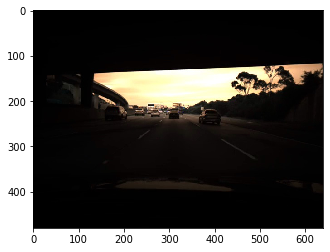

speed: 27.606098
shape: (480, 640, 3)


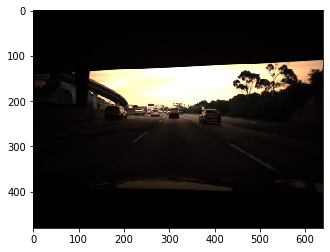

speed: 27.593209
shape: (480, 640, 3)


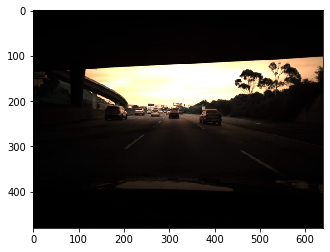

speed: 27.573926
shape: (480, 640, 3)


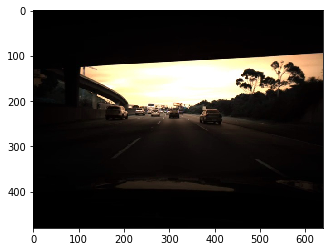

speed: 27.561151
shape: (480, 640, 3)


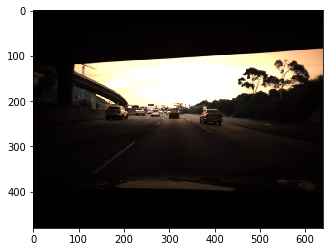

speed: 27.559232
shape: (480, 640, 3)


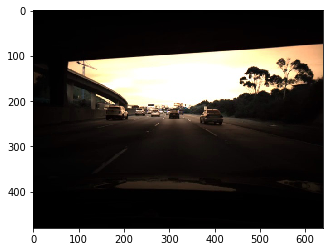

speed: 27.528067
shape: (480, 640, 3)


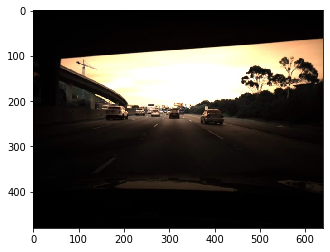

speed: 27.522542
shape: (480, 640, 3)


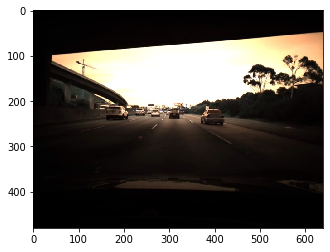

speed: 27.531058
shape: (480, 640, 3)


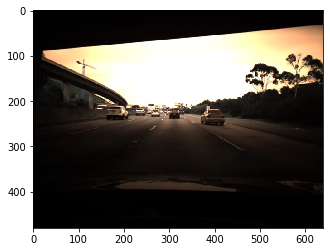

speed: 27.493015000000003
shape: (480, 640, 3)


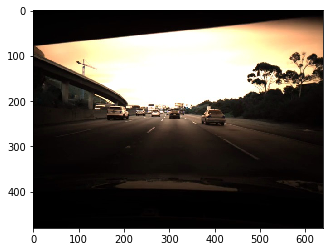

speed: 27.487706
shape: (480, 640, 3)


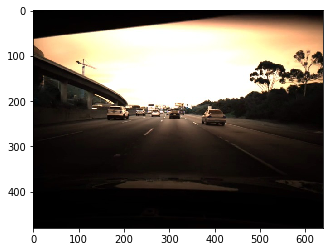

speed: 27.440943
shape: (480, 640, 3)


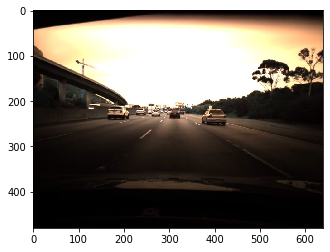

speed: 27.439646000000003
shape: (480, 640, 3)


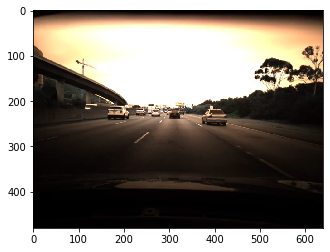

speed: 27.412907
shape: (480, 640, 3)


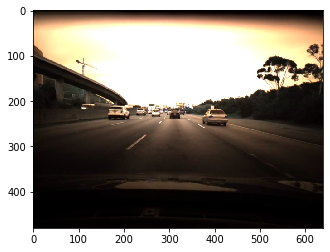

speed: 27.401744
shape: (480, 640, 3)


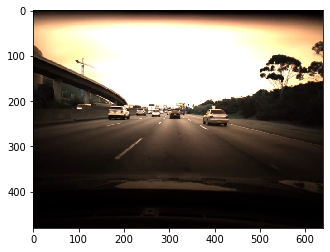

speed: 27.396007
shape: (480, 640, 3)


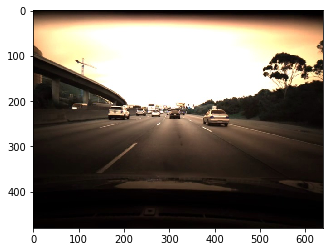

speed: 27.35751
shape: (480, 640, 3)


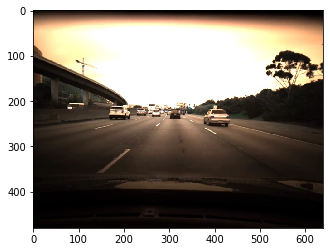

In [14]:
for i in range(50):
    print('speed:',train_meta['speed'][i] )
    img=mpimg.imread(train_meta['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

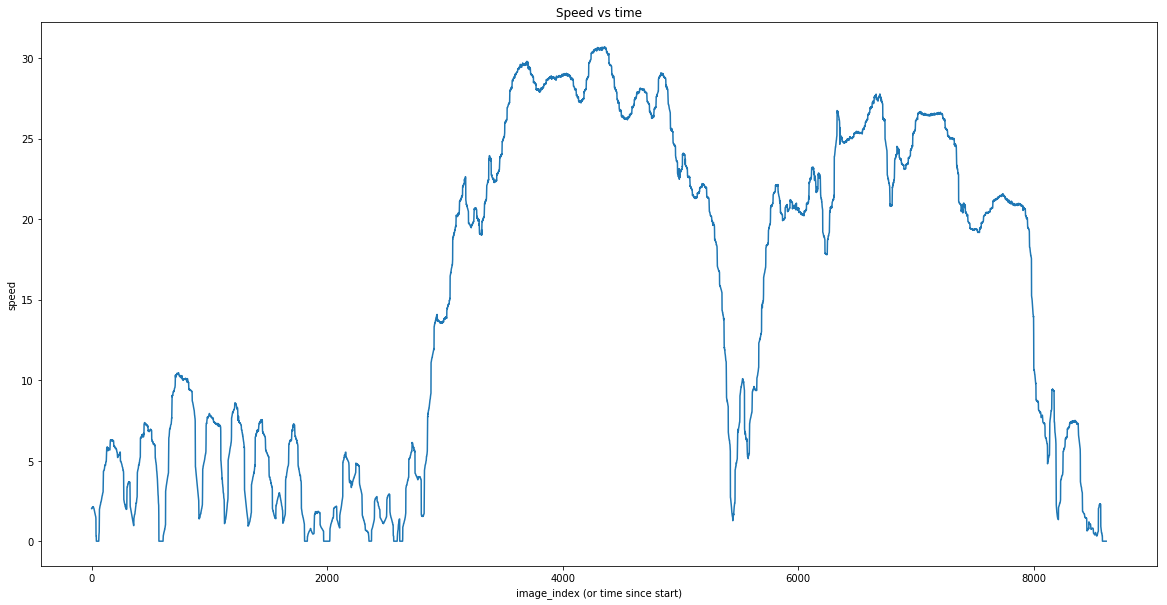

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(train_meta['speed'])
plt.xlabel('image_index (or time since start)')
plt.ylabel('speed')
plt.title('Speed vs time')
plt.show()